# PRODIGY_ML_01

In [ ]:
# Step 1: Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Enable inline plotting
%matplotlib inline


In [ ]:
!pip install -q kaggle
from google.colab import files
files.upload()  # upload kaggle.json here


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ayushbitla","key":"c1cf2cb0e47d8e082a01b90e87841077"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download dataset
!kaggle competitions download -c house-prices-advanced-regression-techniques

# Unzip it
!unzip house-prices-advanced-regression-techniques.zip


  0% 0.00/199k [00:00<?, ?B/s]
100% 199k/199k [00:00<00:00, 825MB/s]
Archive:  house-prices-advanced-regression-techniques.zip
  inflating: data_description.txt    
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
# Load the training dataset
df = pd.read_csv("train.csv")
df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Preprocess Dataset

In [ ]:
features = ['GrLivArea', 'OverallQual']  # you can add more later
target = 'SalePrice'

X = df[features].values
y = df[target].values

# Normalize the data
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X = (X - X_mean) / X_std

# Reshape y
y = y.reshape(-1, 1)


Implement Linear Regression from Scratch

In [ ]:
class LinearRegressionScratch:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.learning_rate = learning_rate
        self.n_iters = n_iters

    def fit(self, X, y):
        self.m, self.n = X.shape
        self.theta = np.zeros((self.n, 1))
        self.bias = 0

        for _ in range(self.n_iters):
            y_pred = np.dot(X, self.theta) + self.bias
            error = y_pred - y

            d_theta = (1/self.m) * np.dot(X.T, error)
            d_bias = (1/self.m) * np.sum(error)

            self.theta -= self.learning_rate * d_theta
            self.bias -= self.learning_rate * d_bias

    def predict(self, X):
        return np.dot(X, self.theta) + self.bias


In [ ]:
model = LinearRegressionScratch(learning_rate=0.01, n_iters=1000)
model.fit(X, y)


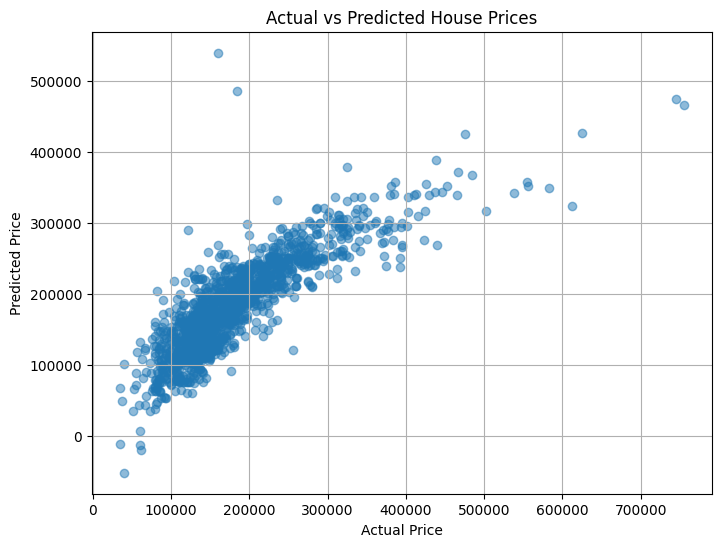

MSE: 1802664188.8368037


In [ ]:
# Predict
y_pred = model.predict(X)

# Plot actual vs predicted
plt.figure(figsize=(8,6))
plt.scatter(y, y_pred, alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.show()

# Mean Squared Error
mse = np.mean((y - y_pred) ** 2)
print("MSE:", mse)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv("train.csv")

# Select features and target
features = ['GrLivArea', 'BedroomAbvGr', 'FullBath']
target = 'SalePrice'

X = df[features]
y = df[target]

# Drop rows with missing values
X = X.dropna()
y = y[X.index]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (sklearn): {mse}")
print(f"R-squared (sklearn): {r2}")


Mean Squared Error (sklearn): 2806426667.247853
R-squared (sklearn): 0.6341189942328371


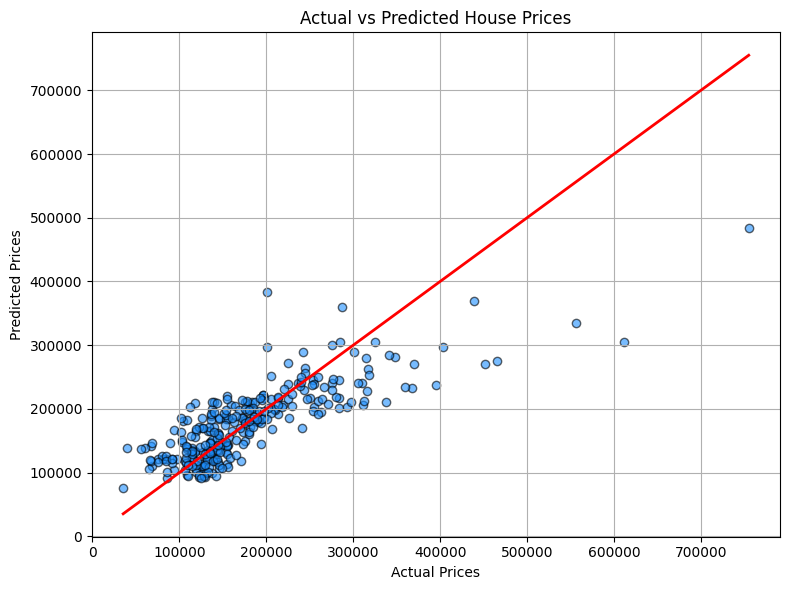

In [ ]:
import matplotlib.pyplot as plt

# Create a figure
plt.figure(figsize=(8, 6))

# Scatter plot: Actual vs Predicted
plt.scatter(y_test, y_pred, alpha=0.6, color='dodgerblue', edgecolors='k')

# Plot the reference line (perfect prediction)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r-', linewidth=2)

# Labels and title
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.tight_layout()
plt.show()


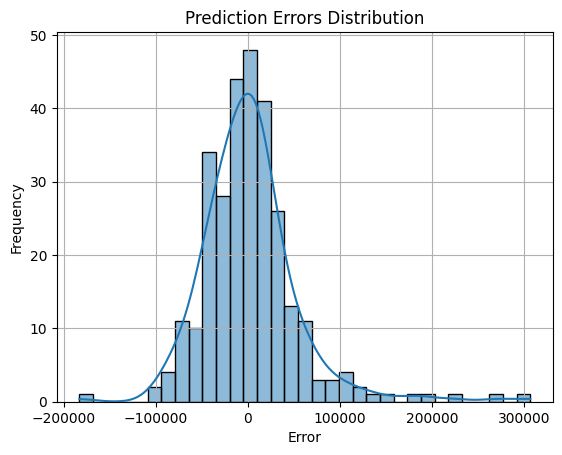

In [ ]:
import seaborn as sns

errors = y_test - y_pred
sns.histplot(errors, kde=True)
plt.title("Prediction Errors Distribution")
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


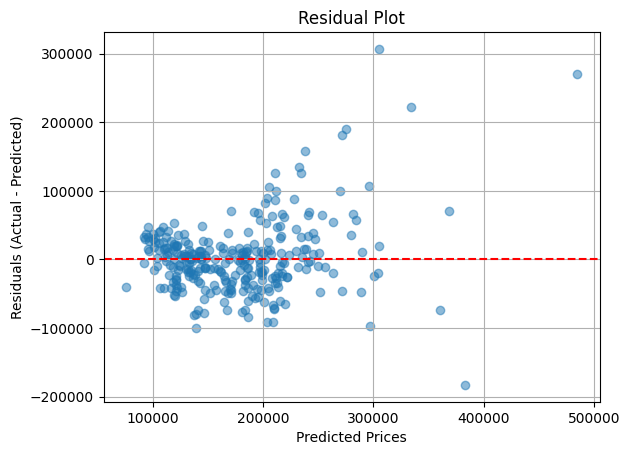

In [ ]:
plt.scatter(y_pred, y_test - y_pred, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot")
plt.grid(True)
plt.show()


In [ ]:
test_df = pd.read_csv("test.csv")


In [ ]:
X_test_final = test_df[['GrLivArea', 'BedroomAbvGr', 'FullBath']]

# If there are missing values, fill or drop (here we'll fill with median)
X_test_final = X_test_final.fillna(X_test_final.median())


In [ ]:
predictions = model.predict(X_test_final)


In [ ]:
submission = pd.DataFrame({
    'Id': test_df['Id'],
    'SalePrice': predictions
})


In [ ]:
submission.to_csv('submission.csv', index=False)


In [ ]:
!kaggle competitions submit -c house-prices-advanced-regression-techniques -f submission.csv -m "Baseline sklearn Linear Regression"


100% 33.7k/33.7k [00:00<00:00, 52.7kB/s]
Successfully submitted to House Prices - Advanced Regression Techniques

In [ ]:
!kaggle competitions submissions -c house-prices-advanced-regression-techniques


fileName        date                        description                         status                     publicScore  privateScore  
--------------  --------------------------  ----------------------------------  -------------------------  -----------  ------------  
submission.csv  2025-07-09 17:02:23.993000  Baseline sklearn Linear Regression  SubmissionStatus.COMPLETE  0.27724                    
